In [1]:
# Process Otovo data from 2017

''' Transactions dataset downloaded from "Last ned Rådata" otovo.no/minside
    Solar production captured from SolarEdge portal (copy the Json object in the file)
    https://monitoring.solaredge.com/solaredge-web/p/charts/253619/comparativeEnergy
'''

In [292]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "notebook_name = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [371]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json
import datetime
sns.set(style="whitegrid")

DATA_PATH='data'
OUTPUT_PATH= os.path.join('output', notebook_name)

if not os.path.exists(OUTPUT_PATH):
    os.makedirs(OUTPUT_PATH)

In [294]:
df = pd.read_csv(os.path.join(DATA_PATH,'2018-01-02 09_40_22.027629+00_00-transactions.csv'),
                skiprows=1,
                names=['time', 'type', 'estimate', 
                       'num_kwh', 'kwh_price_no_vat', 'vat_percent',
                       'amount_without_vat', 'amount_with_vat'],
                index_col=0,
                parse_dates=True)


In [295]:
df.head()

,type,estimate,num_kwh,kwh_price_no_vat,vat_percent,amount_without_vat,amount_with_vat
time,,,,,,,
2016-11-09 23:00:00,elcert,False,3.0,0.020,25,0.060,0.075
2016-11-09 23:00:00,consumption,False,3.0,0.354,25,1.061,1.327
2016-11-10 00:00:00,elcert,False,3.0,0.020,25,0.060,0.075
2016-11-10 00:00:00,consumption,False,3.0,0.349,25,1.048,1.311
2016-11-10 01:00:00,elcert,False,3.0,0.020,25,0.060,0.075


In [296]:
filename = os.path.join(DATA_PATH, 'production.json')
if filename:
    with open(filename, 'r') as f:
        production = json.load(f)

In [297]:
from pprint import pprint
prod17 = production['energy_chart_month'][1]['data']
print(prod17)

[0.041, 0.196, 0.62, 0.955, 1.101, 0.998, 1.179, 0.934, 0.447, 0.371, 0.105, 0.006]


In [298]:
#total production 17
tprod17 = sum(prod17)
print(tprod17)

6.953000000000001


In [351]:
#cost 17 (with enova discount)
cost17 = (899-85)*12
print(cost17)

9768


In [352]:
#cost/kWh produced 2017
cost17kwh = cost17/tprod17/1000
print(cost17kwh)

1.4048612109880625


In [353]:
#gjennomsnittspris nettleie+kraft+avgifter 2017 (https://www.ssb.no/elkraftpris/)
mkdpris = 0.952
purchase_cost = tprod17*mkdpris*1000
print(purchase_cost)

6619.256000000001


In [355]:
#mini ebit
ebit = purchase_cost-cost17
print(ebit)

-3148.743999999999


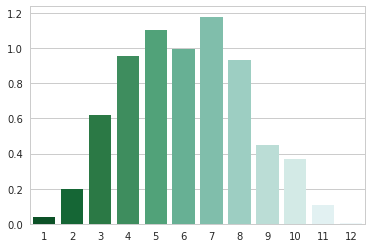

In [303]:
sns.barplot(list(range(1,13)), prod17, palette="BuGn_r")

In [304]:
# look at imports and exports
df_imports = df[df['type'] == 'consumption']
df_imports = df_imports.loc[datetime.date(2017,1,1):datetime.date(2017,12,31)]
df_imports.head()

,type,estimate,num_kwh,kwh_price_no_vat,vat_percent,amount_without_vat,amount_with_vat
time,,,,,,,
2017-01-01 00:00:00,consumption,False,4.0,0.256,25,1.023,1.278
2017-01-01 01:00:00,consumption,False,3.0,0.254,25,0.763,0.954
2017-01-01 02:00:00,consumption,False,3.0,0.254,25,0.762,0.953
2017-01-01 03:00:00,consumption,False,3.0,0.254,25,0.763,0.954
2017-01-01 04:00:00,consumption,False,4.0,0.255,25,1.022,1.277


In [305]:
df_imports['month'] = df_imports.index.month

In [306]:
df_imports_m = df_imports.groupby('month').agg({'num_kwh': ['sum'], 
                                                'amount_with_vat': ['sum']
                                               })

In [307]:
df_imports_m

,num_kwh,amount_with_vat
,sum,sum
month,,
1,3705.0,1283.601
2,3169.0,1115.142
3,2494.0,879.672
4,1616.0,558.843
5,1238.0,423.845
6,835.0,234.553
7,539.0,165.369
8,975.0,305.101


In [308]:
# look at imports and exports
df_exports = df[df['type'] == 'production']
df_exports = df_exports.loc[datetime.date(2017,1,1):datetime.date(2017,12,31)]
df_exports.head()

,type,estimate,num_kwh,kwh_price_no_vat,vat_percent,amount_without_vat,amount_with_vat
time,,,,,,,
2017-03-19 23:00:00,production,False,0.0,-1.0,0,0.0,0.0
2017-03-19 23:00:00,production,False,0.0,-1.0,0,0.0,0.0
2017-03-20 00:00:00,production,False,0.0,-1.0,0,0.0,0.0
2017-03-20 00:00:00,production,False,0.0,-1.0,0,0.0,0.0
2017-03-20 01:00:00,production,False,0.0,-1.0,0,0.0,0.0


In [309]:
df_exports['month'] = df_exports.index.month

In [310]:
df_exports_m = df_exports.groupby('month').agg({'num_kwh': ['sum'], 
                                                'amount_with_vat': ['sum']
                                               })

In [311]:
df_exports_m

,num_kwh,amount_with_vat
,sum,sum
month,,
3,20.0,-20.0
4,233.0,-233.0
5,502.0,-502.0
6,467.0,-467.0
7,717.0,-717.0
8,387.0,-387.0
9,134.0,-134.0
10,112.0,-112.0


In [312]:
df_exports_m.columns = ['exp_kwh', 'exp_amount_with_vat']
df_imports_m.columns = ['imp_kwh', 'imp_amount_with_vat']

In [313]:
df_impexp_m = df_imports_m.merge(df_exports_m, left_index=True, right_index=True, how='left')
df_impexp_m.fillna(0, inplace=True)

In [314]:
df_impexp_m

,imp_kwh,imp_amount_with_vat,exp_kwh,exp_amount_with_vat
month,,,,
1,3705.0,1283.601,0.0,0.0
2,3169.0,1115.142,0.0,0.0
3,2494.0,879.672,20.0,-20.0
4,1616.0,558.843,233.0,-233.0
5,1238.0,423.845,502.0,-502.0
6,835.0,234.553,467.0,-467.0
7,539.0,165.369,717.0,-717.0
8,975.0,305.101,387.0,-387.0
9,1335.0,470.571,134.0,-134.0


In [315]:
# Add solar production
se = pd.Series(prod17) * 1000
df_impexp_m['solar_prod_kwh'] = se
df_impexp_m.fillna(0, inplace=True)
df_impexp_m

,imp_kwh,imp_amount_with_vat,exp_kwh,exp_amount_with_vat,solar_prod_kwh
month,,,,,
1,3705.0,1283.601,0.0,0.0,196.0
2,3169.0,1115.142,0.0,0.0,620.0
3,2494.0,879.672,20.0,-20.0,955.0
4,1616.0,558.843,233.0,-233.0,1101.0
5,1238.0,423.845,502.0,-502.0,998.0
6,835.0,234.553,467.0,-467.0,1179.0
7,539.0,165.369,717.0,-717.0,934.0
8,975.0,305.101,387.0,-387.0,447.0
9,1335.0,470.571,134.0,-134.0,371.0


In [316]:
df_impexp_m['solar_utilised_kwh'] = df_impexp_m['solar_prod_kwh'] - df_impexp_m['exp_kwh']
df_impexp_m

,imp_kwh,imp_amount_with_vat,exp_kwh,exp_amount_with_vat,solar_prod_kwh,solar_utilised_kwh
month,,,,,,
1,3705.0,1283.601,0.0,0.0,196.0,196.0
2,3169.0,1115.142,0.0,0.0,620.0,620.0
3,2494.0,879.672,20.0,-20.0,955.0,935.0
4,1616.0,558.843,233.0,-233.0,1101.0,868.0
5,1238.0,423.845,502.0,-502.0,998.0,496.0
6,835.0,234.553,467.0,-467.0,1179.0,712.0
7,539.0,165.369,717.0,-717.0,934.0,217.0
8,975.0,305.101,387.0,-387.0,447.0,60.0
9,1335.0,470.571,134.0,-134.0,371.0,237.0


In [317]:
df_impexp_m['grid_and_solar_used_kwh'] = df_impexp_m['solar_utilised_kwh'] + df_impexp_m['imp_kwh']
df_impexp_m

,imp_kwh,imp_amount_with_vat,exp_kwh,exp_amount_with_vat,solar_prod_kwh,solar_utilised_kwh,grid_and_solar_used_kwh
month,,,,,,,
1,3705.0,1283.601,0.0,0.0,196.0,196.0,3901.0
2,3169.0,1115.142,0.0,0.0,620.0,620.0,3789.0
3,2494.0,879.672,20.0,-20.0,955.0,935.0,3429.0
4,1616.0,558.843,233.0,-233.0,1101.0,868.0,2484.0
5,1238.0,423.845,502.0,-502.0,998.0,496.0,1734.0
6,835.0,234.553,467.0,-467.0,1179.0,712.0,1547.0
7,539.0,165.369,717.0,-717.0,934.0,217.0,756.0
8,975.0,305.101,387.0,-387.0,447.0,60.0,1035.0
9,1335.0,470.571,134.0,-134.0,371.0,237.0,1572.0


In [318]:
df_impexp_m.sum()

imp_kwh                    23405.000
imp_amount_with_vat         8264.971
exp_kwh                     2575.000
exp_amount_with_vat        -2575.000
solar_prod_kwh              6912.000
solar_utilised_kwh          4337.000
grid_and_solar_used_kwh    27742.000
dtype: float64

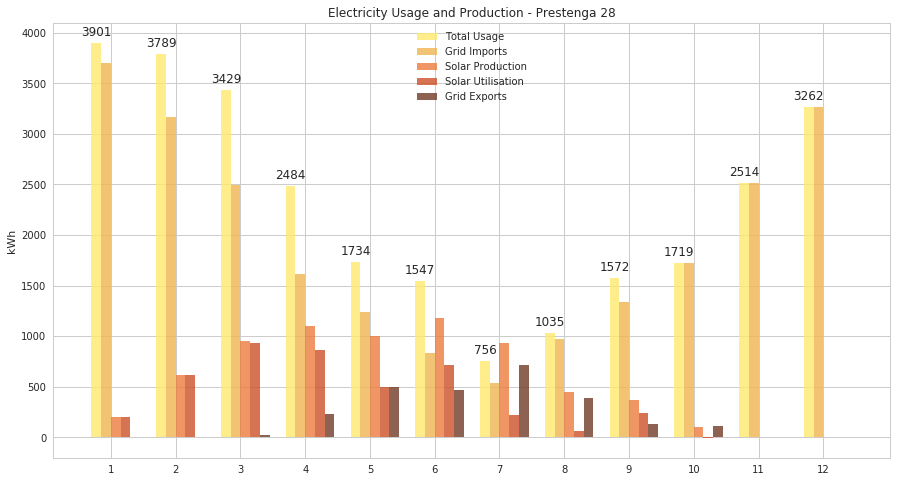

In [319]:
pos = list(range(len(df_impexp_m.index))) 
width = 0.15
f, ax = plt.subplots(figsize=(15, 8))

def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.95: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')

r1 = ax.bar(pos, df_impexp_m['grid_and_solar_used_kwh'], width, alpha=0.8, color='#FFE96F', label='Total')
r2 = ax.bar([p + width for p in pos], df_impexp_m['imp_kwh'], width, alpha=0.8, color='#F0B551', label='Grid import')
r3 = ax.bar([p + width*2 for p in pos], df_impexp_m['solar_prod_kwh'], width, alpha=0.8, color='#EB7C3D', label = 'Solar production')
r4 = ax.bar([p + width*3 for p in pos], df_impexp_m['solar_utilised_kwh'], width, alpha=0.8, color='#CC5028', label='Solar utilisation')
r5 = ax.bar([p + width*4 for p in pos], df_impexp_m['exp_kwh'], width, alpha=0.8, color='#723B28', label='Grid export')

ax.set_ylabel('kWh')
ax.set_title('Electricity Usage and Production - Prestenga 28')
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df_impexp_m.index.values)

# Setting the x-axis and y-axis limits
#plt.xlim(min(pos)-width, max(pos)+width*5)
#plt.ylim([0, max(df_impexp_m['grid_and_solar_used_kwh'])] )

autolabel(r1, ax)
#autolabel(r2, ax)
#autolabel(r3, ax)
#autolabel(r4, ax)
#autolabel(r5, ax)

# Adding the legend and showing the plot
plt.legend(['Total Usage', 'Grid Imports', 'Solar Production', 'Solar Utilisation', 'Grid Exports'], loc='upper center')
plt.show()

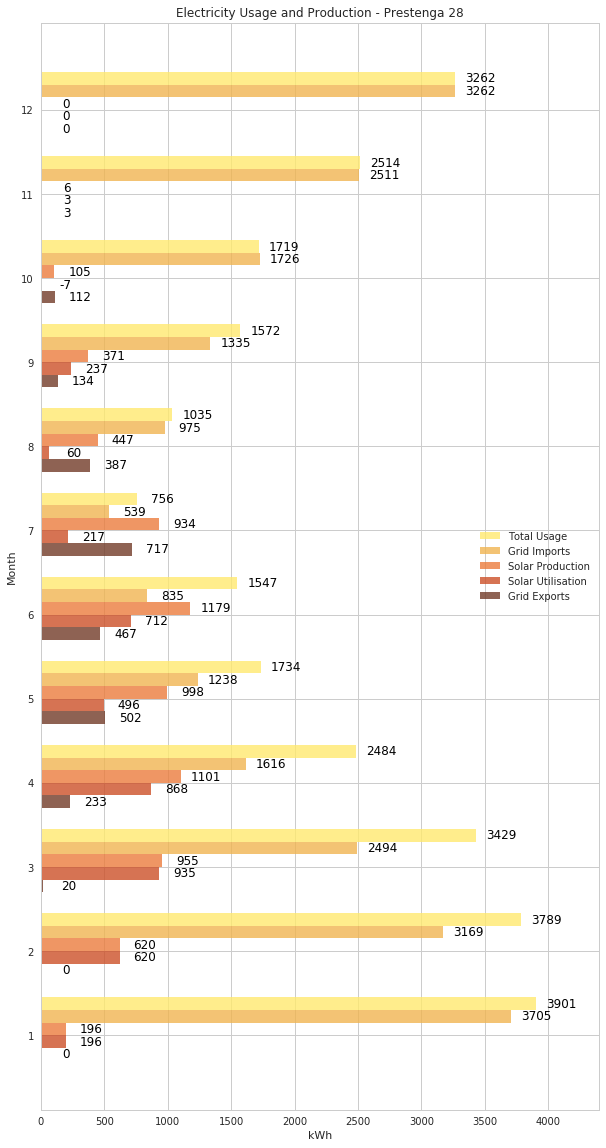

In [320]:
# Test horizonal layout

pos = list(range(len(df_impexp_m.index))) 
height = 0.15
f, ax = plt.subplots(figsize=(10,20))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        width = rect.get_width()
        ax.text((rect.get_x() + rect.get_width())+200, rect.get_y() + rect.get_height()/2.,
                '%.f' % width,
                ha='center', va='center', color='black')

r1 = ax.barh([p + height*4 for p in pos], df_impexp_m['grid_and_solar_used_kwh'], height, alpha=0.8, color='#FFE96F', label='Total')
r2 = ax.barh([p + height*3 for p in pos], df_impexp_m['imp_kwh'], height, alpha=0.8, color='#F0B551', label='Grid import')
r3 = ax.barh([p + height*2 for p in pos], df_impexp_m['solar_prod_kwh'], height, alpha=0.8, color='#EB7C3D', label = 'Solar production')
r4 = ax.barh([p + height*1 for p in pos], df_impexp_m['solar_utilised_kwh'], height, alpha=0.8, color='#CC5028', label='Solar utilisation')
r5 = ax.barh(pos, df_impexp_m['exp_kwh'], height, alpha=0.8, color='#723B28', label='Grid export')

ax.set_ylabel('Month')
ax.set_xlabel('kWh')
ax.set_title('Electricity Usage and Production - Prestenga 28')
ax.set_yticks([p + 1.5 * height for p in pos])

# Set the labels for the x ticks
ax.set_yticklabels(df_impexp_m.index.values)

# Setting the x-axis and y-axis limits
#plt.xlim(min(pos)-width, max(pos)+width*5)
plt.xlim([0, max(df_impexp_m['grid_and_solar_used_kwh'])+500] )

autolabel(r1)
autolabel(r2)
autolabel(r3)
autolabel(r4)
autolabel(r5)

# Adding the legend and showing the plot
plt.legend(['Total Usage', 'Grid Imports', 'Solar Production', 'Solar Utilisation', 'Grid Exports'], loc='center right')
plt.show()



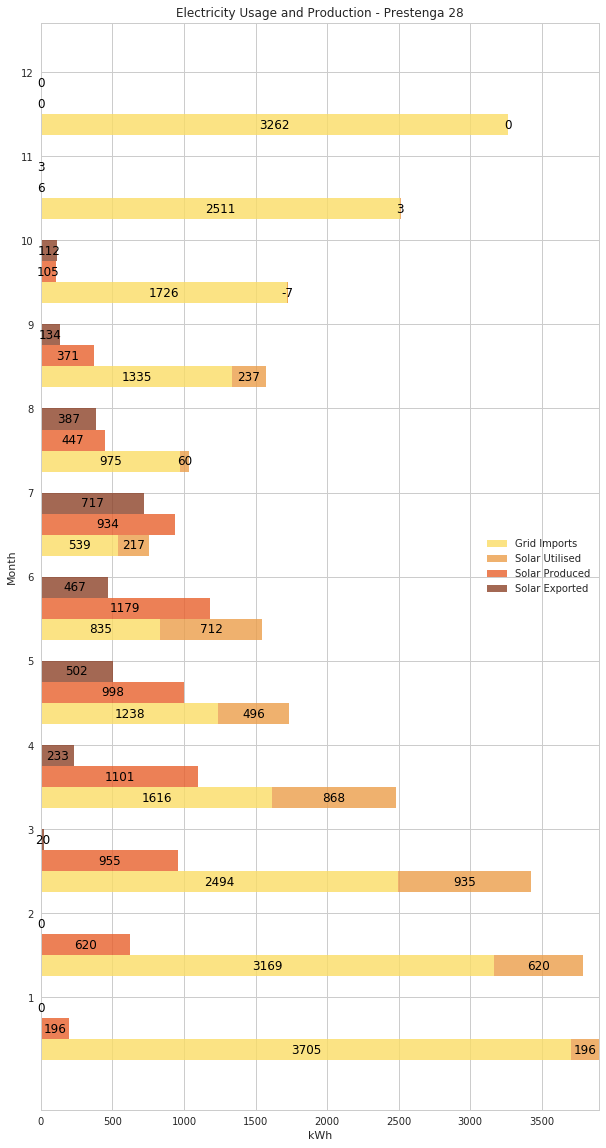

In [335]:
# Test stacked layout

pos = list(range(len(df_impexp_m.index))) 
height = 0.25
f, ax = plt.subplots(figsize=(10,20))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        width = rect.get_width()
        ax.text((rect.get_x() + width/2.), rect.get_y() + rect.get_height()/2.,
                '%.f' % width,
                ha='center', va='center', color='black')


r1 = ax.barh(pos, df_impexp_m['imp_kwh'], height, alpha=0.8, color='#FADD66', label='Grid import')
r2 = ax.barh(pos, df_impexp_m['solar_utilised_kwh'], height, df_impexp_m['imp_kwh'], alpha=0.8, color='#EB9E4A', label='Solar utilised')
r3 = ax.barh([p + height for p in pos], df_impexp_m['solar_prod_kwh'], height, alpha=0.8, color='#E8602C', label = 'Solar production')
r4 = ax.barh([p + height*2 for p in pos], df_impexp_m['exp_kwh'], height, alpha=0.8, color='#8C4228', label='Grid export')


ax.set_ylabel('Month')
ax.set_xlabel('kWh')
ax.set_title('Electricity Usage and Production - Prestenga 28')
ax.set_yticks([p + 2.5 * height for p in pos])

# Set the labels for the x ticks
ax.set_yticklabels(df_impexp_m.index.values)

# Setting the x-axis and y-axis limits
#plt.xlim(min(pos)-width, max(pos)+width*5)
plt.xlim([0, max(df_impexp_m['solar_utilised_kwh'] + df_impexp_m['imp_kwh'])] )

autolabel(r1)
autolabel(r2)
autolabel(r3)
autolabel(r4)

# Adding the legend and showing the plot
plt.legend(['Grid Imports', 'Solar Utilised', 'Solar Produced', 'Solar Exported'], loc='center right')
plt.show()

In [344]:
# Nettleie
df_impexp_m['nettleie_fastledd'] = 2142/12.
df_impexp_m['nettleie_energiledd'] = 0.
df_impexp_m['nettleie_exp'] = 0.
df_impexp_m.loc[[5,6,7,8,9,10], 'nettleie_energiledd'] = df_impexp_m.loc[[5,6,7,8,9,10], 'imp_kwh'] * 39.83/100.
df_impexp_m.loc[[1,2,3,4,11,12], 'nettleie_energiledd'] = df_impexp_m.loc[[1,2,3,4,11,12], 'imp_kwh'] * 41.53/100.
df_impexp_m.loc[[5,6,7,8,9,10], 'nettleie_exp'] = df_impexp_m.loc[[5,6,7,8,9,10], 'exp_kwh'] * -1.67/100.
df_impexp_m.loc[[1,2,3,4,11,12], 'nettleie_exp'] = df_impexp_m.loc[[1,2,3,4,11,12], 'exp_kwh'] * -2.18/100.
df_impexp_m

,imp_kwh,imp_amount_with_vat,exp_kwh,exp_amount_with_vat,solar_prod_kwh,solar_utilised_kwh,grid_and_solar_used_kwh,nettleie_fastledd,nettleie_energiledd,nettleie_exp
month,,,,,,,,,,
1,3705.0,1283.601,0.0,0.0,196.0,196.0,3901.0,178.5,1538.6865,-0.0000
2,3169.0,1115.142,0.0,0.0,620.0,620.0,3789.0,178.5,1316.0857,-0.0000
3,2494.0,879.672,20.0,-20.0,955.0,935.0,3429.0,178.5,1035.7582,-0.4360
4,1616.0,558.843,233.0,-233.0,1101.0,868.0,2484.0,178.5,671.1248,-5.0794
5,1238.0,423.845,502.0,-502.0,998.0,496.0,1734.0,178.5,493.0954,-8.3834
6,835.0,234.553,467.0,-467.0,1179.0,712.0,1547.0,178.5,332.5805,-7.7989
7,539.0,165.369,717.0,-717.0,934.0,217.0,756.0,178.5,214.6837,-11.9739
8,975.0,305.101,387.0,-387.0,447.0,60.0,1035.0,178.5,388.3425,-6.4629
9,1335.0,470.571,134.0,-134.0,371.0,237.0,1572.0,178.5,531.7305,-2.2378


In [345]:
df_all = df_impexp_m[[c for c in df_impexp_m if c not in ['imp_amount_with_vat', 'exp_amount_with_vat']] + ['imp_amount_with_vat', 'exp_amount_with_vat']]
df_all

,imp_kwh,exp_kwh,solar_prod_kwh,solar_utilised_kwh,grid_and_solar_used_kwh,nettleie_fastledd,nettleie_energiledd,nettleie_exp,imp_amount_with_vat,exp_amount_with_vat
month,,,,,,,,,,
1,3705.0,0.0,196.0,196.0,3901.0,178.5,1538.6865,-0.0000,1283.601,0.0
2,3169.0,0.0,620.0,620.0,3789.0,178.5,1316.0857,-0.0000,1115.142,0.0
3,2494.0,20.0,955.0,935.0,3429.0,178.5,1035.7582,-0.4360,879.672,-20.0
4,1616.0,233.0,1101.0,868.0,2484.0,178.5,671.1248,-5.0794,558.843,-233.0
5,1238.0,502.0,998.0,496.0,1734.0,178.5,493.0954,-8.3834,423.845,-502.0
6,835.0,467.0,1179.0,712.0,1547.0,178.5,332.5805,-7.7989,234.553,-467.0
7,539.0,717.0,934.0,217.0,756.0,178.5,214.6837,-11.9739,165.369,-717.0
8,975.0,387.0,447.0,60.0,1035.0,178.5,388.3425,-6.4629,305.101,-387.0
9,1335.0,134.0,371.0,237.0,1572.0,178.5,531.7305,-2.2378,470.571,-134.0


In [348]:
# what would it cost if all the energy came from the grid and there was no solar
df_impexp_m['grid_kraft'] = 33/100. * df_impexp_m['grid_and_solar_used_kwh']
df_impexp_m['grid_nett_energi'] = 0
df_impexp_m.loc[[5,6,7,8,9,10], 'grid_nett_energi'] = df_impexp_m.loc[[5,6,7,8,9,10], 'grid_and_solar_used_kwh'] * 39.83/100.
df_impexp_m.loc[[1,2,3,4,11,12], 'grid_nett_energi'] = df_impexp_m.loc[[1,2,3,4,11,12], 'grid_and_solar_used_kwh'] * 41.53/100.

df_impexp_m['grid_total'] = df_impexp_m['grid_kraft'] + df_impexp_m['grid_nett_energi'] + df_impexp_m['nettleie_fastledd']
df_impexp_m['grid_total_per_kwh'] = df_impexp_m['grid_total']/df_impexp_m['grid_and_solar_used_kwh']
df_impexp_m

,imp_kwh,imp_amount_with_vat,exp_kwh,exp_amount_with_vat,solar_prod_kwh,solar_utilised_kwh,grid_and_solar_used_kwh,nettleie_fastledd,nettleie_energiledd,nettleie_exp,grid_kraft,grid_nett_energi,grid_total,grid_total_per_kwh
month,,,,,,,,,,,,,,
1,3705.0,1283.601,0.0,0.0,196.0,196.0,3901.0,178.5,1538.6865,-0.0000,1287.33,1620.0853,3085.9153,0.791057
2,3169.0,1115.142,0.0,0.0,620.0,620.0,3789.0,178.5,1316.0857,-0.0000,1250.37,1573.5717,3002.4417,0.792410
3,2494.0,879.672,20.0,-20.0,955.0,935.0,3429.0,178.5,1035.7582,-0.4360,1131.57,1424.0637,2734.1337,0.797356
4,1616.0,558.843,233.0,-233.0,1101.0,868.0,2484.0,178.5,671.1248,-5.0794,819.72,1031.6052,2029.8252,0.817160
5,1238.0,423.845,502.0,-502.0,998.0,496.0,1734.0,178.5,493.0954,-8.3834,572.22,690.6522,1441.3722,0.831241
6,835.0,234.553,467.0,-467.0,1179.0,712.0,1547.0,178.5,332.5805,-7.7989,510.51,616.1701,1305.1801,0.843685
7,539.0,165.369,717.0,-717.0,934.0,217.0,756.0,178.5,214.6837,-11.9739,249.48,301.1148,729.0948,0.964411
8,975.0,305.101,387.0,-387.0,447.0,60.0,1035.0,178.5,388.3425,-6.4629,341.55,412.2405,932.2905,0.900764
9,1335.0,470.571,134.0,-134.0,371.0,237.0,1572.0,178.5,531.7305,-2.2378,518.76,626.1276,1323.3876,0.841850


In [362]:
#What did it actually cost - with blended solar and grid?
df_impexp_m['solar_lease_amt'] = 899-85
df_impexp_m['solar_kraft'] = df_impexp_m['imp_amount_with_vat'] + df_impexp_m['exp_amount_with_vat']
df_impexp_m['solar_nettleie'] = df_impexp_m['nettleie_fastledd'] + df_impexp_m['nettleie_energiledd'] + df_impexp_m['nettleie_exp']
df_impexp_m['solar_total'] = df_impexp_m['solar_lease_amt'] + df_impexp_m['solar_kraft'] + df_impexp_m['solar_nettleie']
df_impexp_m['solar_total_per_kwh'] = df_impexp_m['solar_total']/(df_impexp_m['imp_kwh'] + df_impexp_m['solar_prod_kwh'])
df_impexp_m

,imp_kwh,imp_amount_with_vat,exp_kwh,exp_amount_with_vat,solar_prod_kwh,solar_utilised_kwh,grid_and_solar_used_kwh,nettleie_fastledd,nettleie_energiledd,nettleie_exp,grid_kraft,grid_nett_energi,grid_total,grid_total_per_kwh,solar_lease_amt,solar_kraft,solar_nettleie,solar_total,solar_total_per_kwh
month,,,,,,,,,,,,,,,,,,,
1,3705.0,1283.601,0.0,0.0,196.0,196.0,3901.0,178.5,1538.6865,-0.0000,1287.33,1620.0853,3085.9153,0.791057,814,1283.601,1717.1865,3814.7875,0.977900
2,3169.0,1115.142,0.0,0.0,620.0,620.0,3789.0,178.5,1316.0857,-0.0000,1250.37,1573.5717,3002.4417,0.792410,814,1115.142,1494.5857,3423.7277,0.903597
3,2494.0,879.672,20.0,-20.0,955.0,935.0,3429.0,178.5,1035.7582,-0.4360,1131.57,1424.0637,2734.1337,0.797356,814,859.672,1213.8222,2887.4942,0.837198
4,1616.0,558.843,233.0,-233.0,1101.0,868.0,2484.0,178.5,671.1248,-5.0794,819.72,1031.6052,2029.8252,0.817160,814,325.843,844.5454,1984.3884,0.730360
5,1238.0,423.845,502.0,-502.0,998.0,496.0,1734.0,178.5,493.0954,-8.3834,572.22,690.6522,1441.3722,0.831241,814,-78.155,663.2120,1399.0570,0.625696
6,835.0,234.553,467.0,-467.0,1179.0,712.0,1547.0,178.5,332.5805,-7.7989,510.51,616.1701,1305.1801,0.843685,814,-232.447,503.2816,1084.8346,0.538647
7,539.0,165.369,717.0,-717.0,934.0,217.0,756.0,178.5,214.6837,-11.9739,249.48,301.1148,729.0948,0.964411,814,-551.631,381.2098,643.5788,0.436917
8,975.0,305.101,387.0,-387.0,447.0,60.0,1035.0,178.5,388.3425,-6.4629,341.55,412.2405,932.2905,0.900764,814,-81.899,560.3796,1292.4806,0.908917
9,1335.0,470.571,134.0,-134.0,371.0,237.0,1572.0,178.5,531.7305,-2.2378,518.76,626.1276,1323.3876,0.841850,814,336.571,707.9927,1858.5637,1.089428


In [366]:
df_impexp_m[['grid_total', 'solar_lease_amt', 'solar_total']].sum()

grid_total         22675.9416
solar_lease_amt     9768.0000
solar_total        27162.7434
dtype: float64

In [367]:
df_impexp_m['grid_total'].sum() - df_impexp_m['solar_total'].sum()

-4486.801800000012

In [368]:
df_impexp_m[['grid_total_per_kwh', 'solar_total_per_kwh']].mean()

grid_total_per_kwh     0.835700
solar_total_per_kwh    0.876888
dtype: float64

In [372]:
df_impexp_m.to_csv(path_or_buf=os.path.join(OUTPUT_PATH, '2017_solar_summary.csv'))